In [138]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [139]:
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',100)

In [140]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [141]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [142]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [144]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [145]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [146]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [147]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [148]:
df.describe().corr().T

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.989973,0.980847,0.979503,-0.379855,0.398163
Education,0.989973,1.000000,0.997387,0.997079,-0.504141,0.271671
Usage,0.980847,0.997387,1.000000,0.999936,-0.550432,0.238391
Fitness,0.979503,0.997079,0.999936,1.000000,-0.556487,0.230143
Income,-0.379855,-0.504141,-0.550432,-0.556487,1.000000,0.630985
Miles,0.398163,0.271671,0.238391,0.230143,0.630985,1.000000


In [149]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [150]:
df.min()

Product              TM195
Age                     18
Gender              Female
Education               12
MaritalStatus    Partnered
Usage                    2
Fitness                  1
Income               29562
Miles                   21
dtype: object

In [151]:
df.max()

Product           TM798
Age                  50
Gender             Male
Education            21
MaritalStatus    Single
Usage                 7
Fitness               5
Income           104581
Miles               360
dtype: object

In [152]:
col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
for x in col:
    print('{}:{}'.format(x.upper(),df[x].unique()))

PRODUCT:['TM195' 'TM498' 'TM798']
MARITALSTATUS:['Single' 'Partnered']
USAGE:[3 2 4 5 6 7]
FITNESS:[4 3 2 1 5]
EDUCATION:[14 15 12 13 16 18 20 21]
AGE:[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


In [153]:
col1=['Product','MaritalStatus','Usage','Fitness','Education','Gender']
for x in col1:
    print(df[x].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64


In [154]:
for i in df.columns:
    print(i,len([df[i]==0]))

Product 1
Age 1
Gender 1
Education 1
MaritalStatus 1
Usage 1
Fitness 1
Income 1
Miles 1


In [155]:
print(len(df))

180


In [156]:
list=['TM195', 'TM498', 'TM798']
for i in list:
    print(df[df['Product']==i].describe())

             Age  Education      Usage   Fitness       Income       Miles
count  80.000000  80.000000  80.000000  80.00000     80.00000   80.000000
mean   28.550000  15.037500   3.087500   2.96250  46418.02500   82.787500
std     7.221452   1.216383   0.782624   0.66454   9075.78319   28.874102
min    18.000000  12.000000   2.000000   1.00000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000   3.00000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000   3.00000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000   3.00000  53439.00000   94.000000
max    50.000000  18.000000   5.000000   5.00000  68220.00000  188.000000
             Age  Education      Usage   Fitness        Income       Miles
count  60.000000  60.000000  60.000000  60.00000     60.000000   60.000000
mean   28.900000  15.116667   3.066667   2.90000  48973.650000   87.933333
std     6.645248   1.222552   0.799717   0.62977   8653.989388   33.263135
min    19.000000  12.000000   2.00

<Figure size 14400x14400 with 0 Axes>

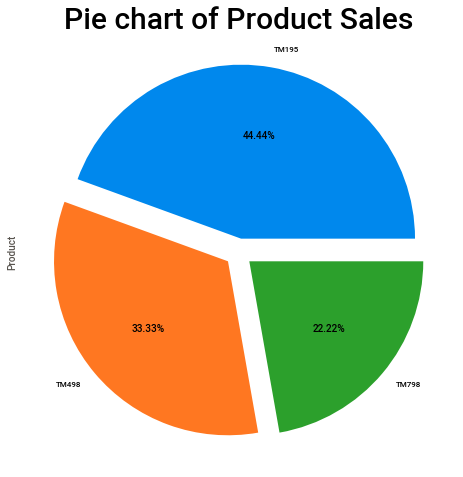

In [157]:
explode=(0.08,0.08,0.08)
fig = plt.figure(figsize=(200, 200))
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8),explode=explode)
plt.title("Pie chart of Product Sales", fontsize=30)
plt.show()

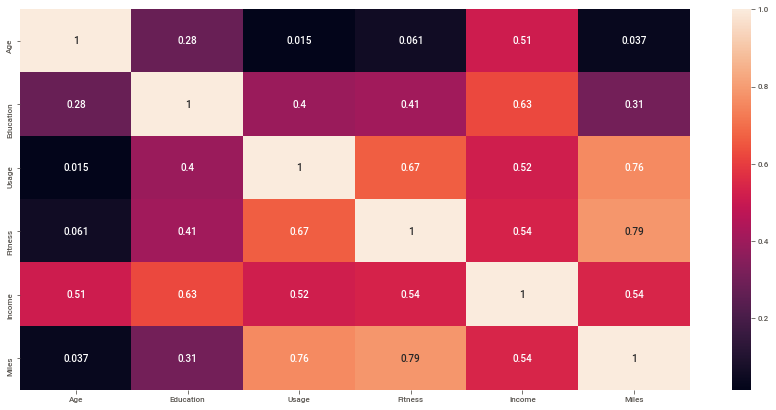

In [158]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

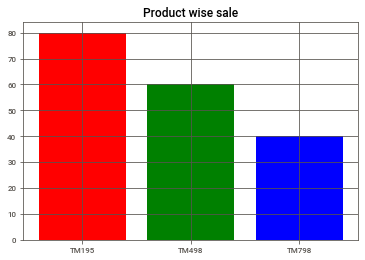

In [159]:
plt.bar(df['Product'].unique(), df["Product"].value_counts(), color = ['r', 'g','b'])
plt.title("Product wise sale")
plt.grid(True)

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 720x720 with 0 Axes>

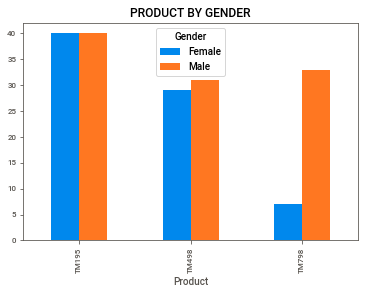

In [160]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Product'],df['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')
plt.title("PRODUCT BY GENDER")

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5, 1.0, 'PRODUCT BY MaritalStatus')

<Figure size 720x720 with 0 Axes>

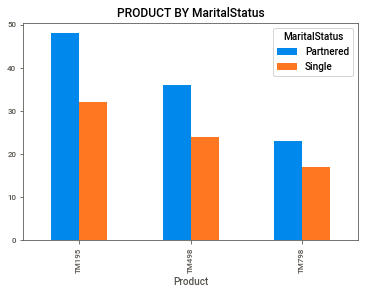

In [161]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Product'],df['MaritalStatus'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')
plt.title("PRODUCT BY MaritalStatus")

Usage     2   3   4   5  6  7
Product                      
TM195    19  37  22   2  0  0
TM498    14  31  12   3  0  0
TM798     0   1  18  12  7  2


Text(0.5, 1.0, 'PRODUCT BY Usage')

<Figure size 720x720 with 0 Axes>

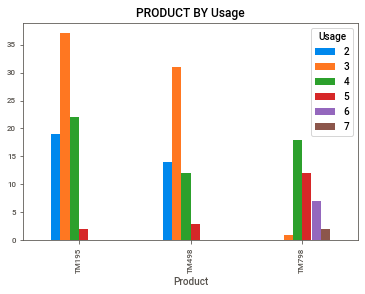

In [162]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Product'],df['Usage'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')
plt.title("PRODUCT BY Usage")

[Text(0.5, 1.0, 'Product By Education')]

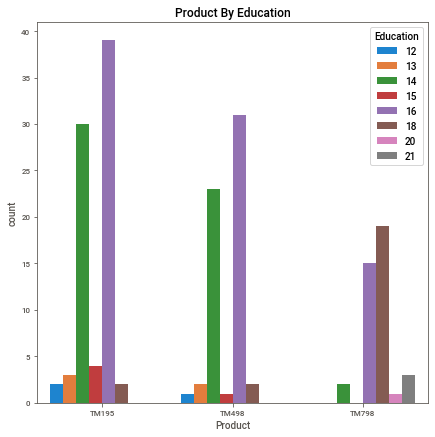

In [163]:
plt.figure(figsize=(7,7))
sns.countplot(df['Product'],hue=df["Education"]).set(title='Product By Education')

Fitness  1   2   3  4   5
Product                  
TM195    1  14  54  9   2
TM498    1  12  39  8   0
TM798    0   0   4  7  29


Text(0.5, 1.0, 'PRODUCT By Fitness')

<Figure size 720x720 with 0 Axes>

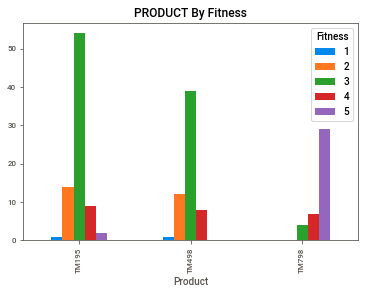

In [164]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Product'],df['Fitness'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')
plt.title("PRODUCT By Fitness")

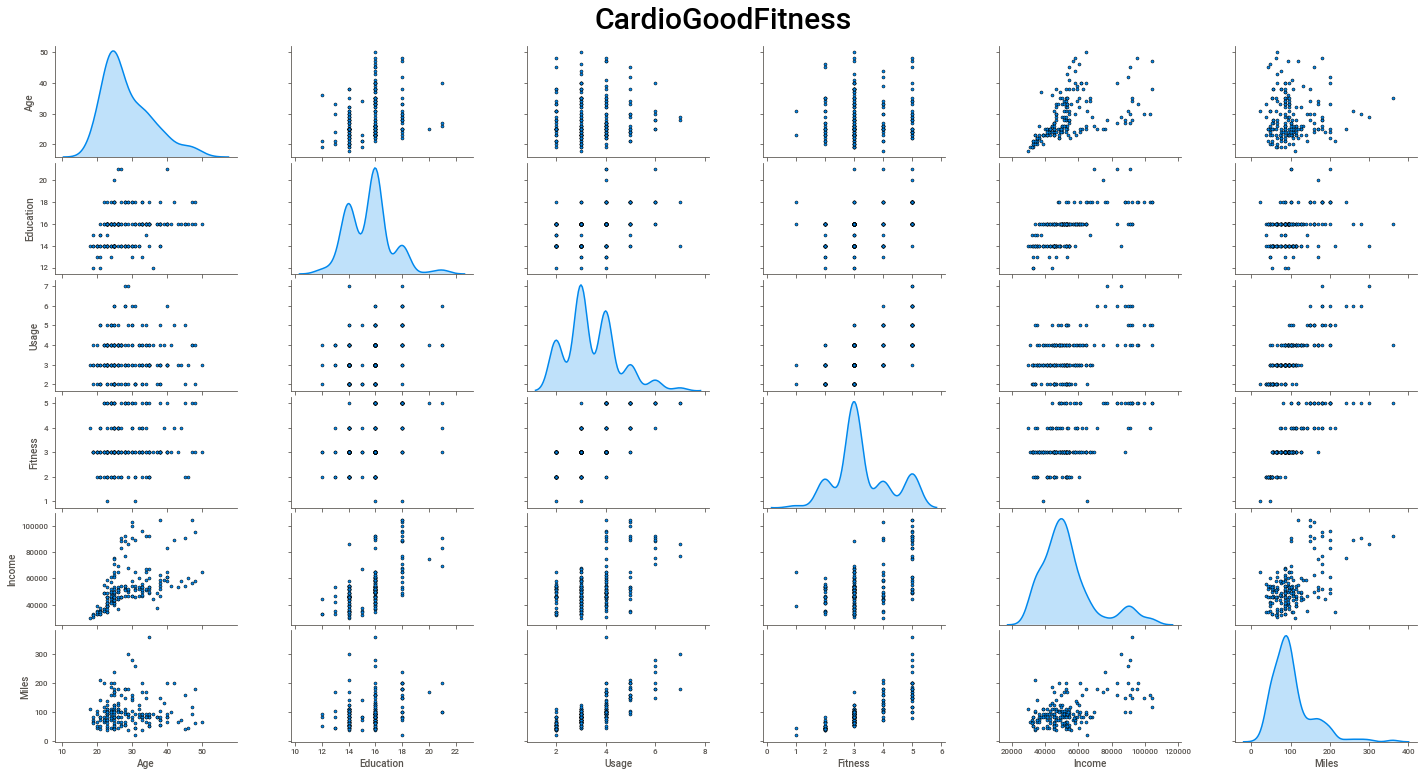

In [165]:
pp = sns.pairplot(df, height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('CardioGoodFitness', fontsize=30)

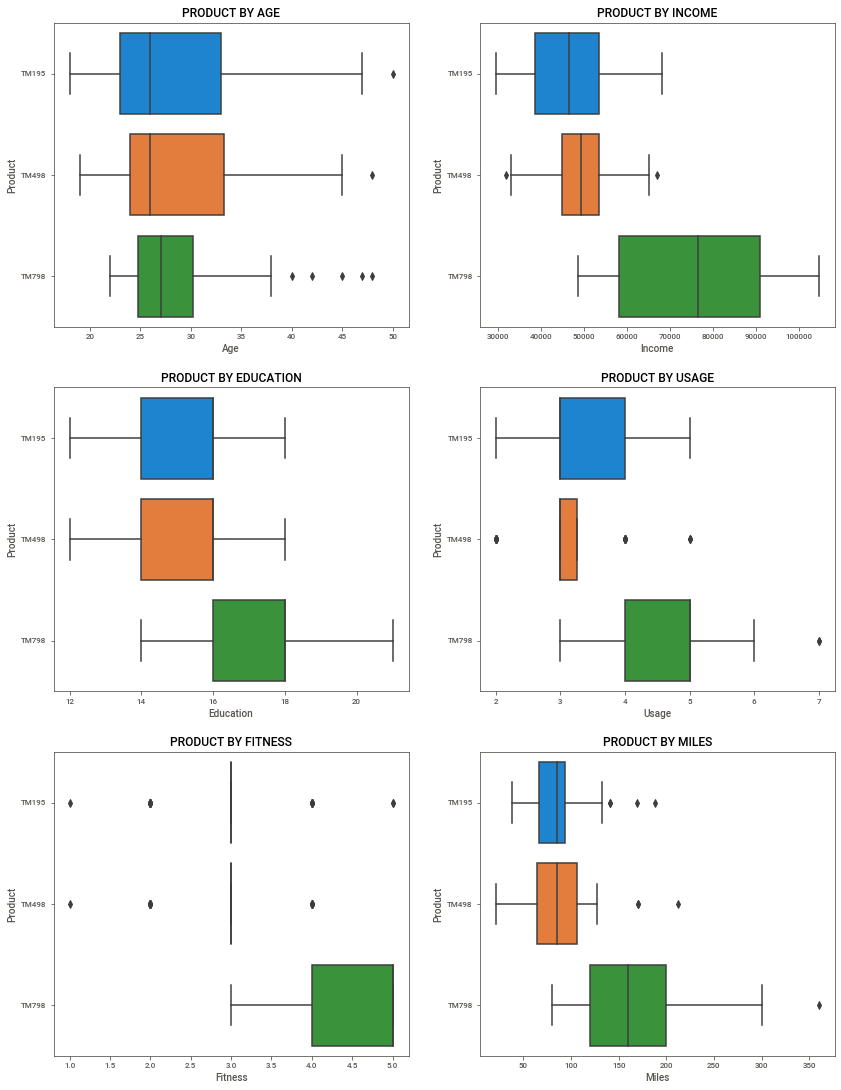

In [166]:
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],df['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper())

[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

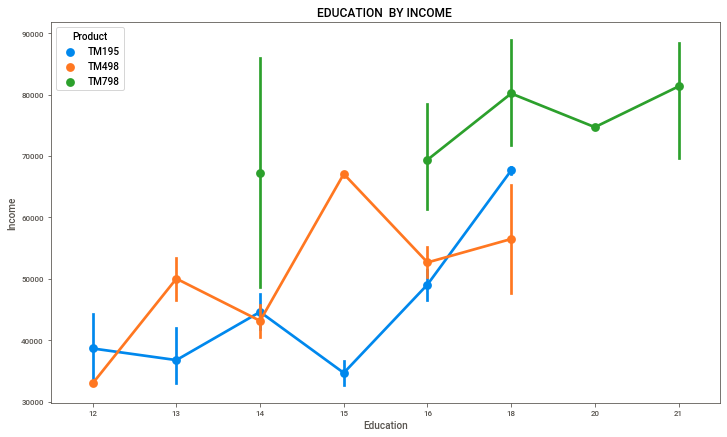

In [167]:
plt.figure(figsize=(12,7))
sns.pointplot(x=df["Education"],y=df["Income"],hue=df['Product']).set(title='EDUCATION  BY INCOME ') 

[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

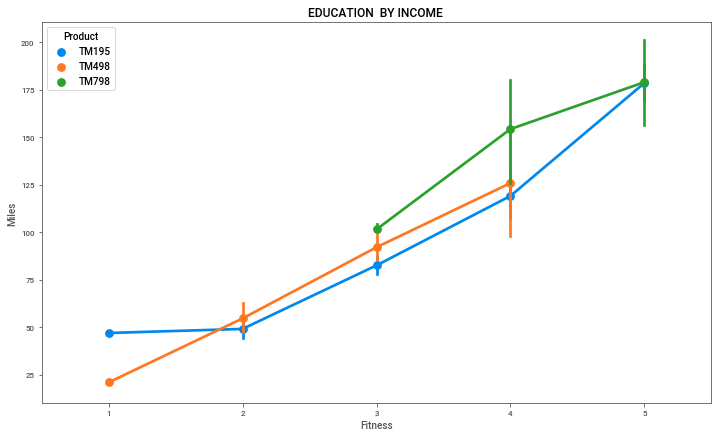

In [168]:
plt.figure(figsize=(12,7))
sns.pointplot(x=df["Fitness"],y=df["Miles"],hue=df['Product']).set(title='EDUCATION  BY INCOME ')

<Figure size 864x504 with 0 Axes>

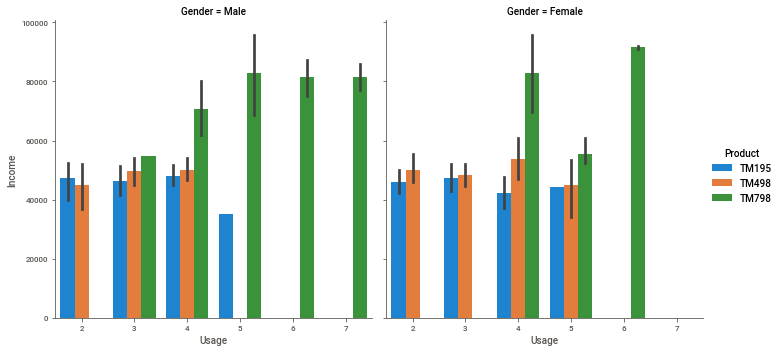

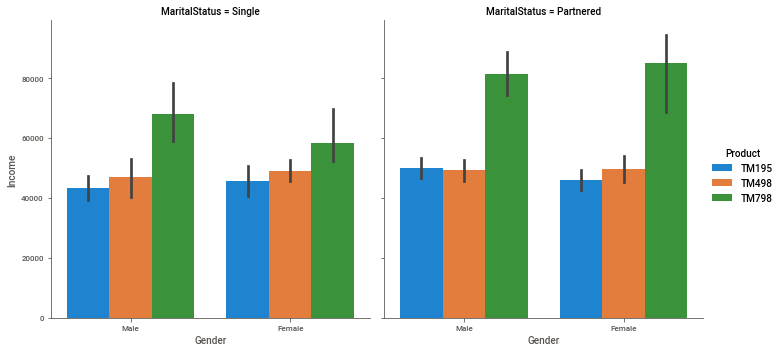

In [169]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df) 
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df,kind='bar')

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14


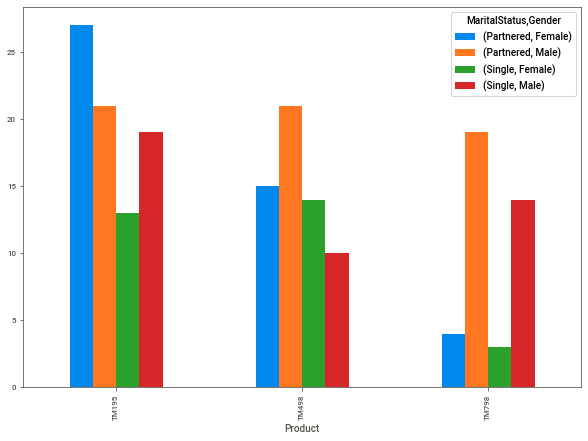

In [170]:
prd_mar_gen= pd.crosstab(index=df["Product"], columns=[df["MaritalStatus"],df["Gender"]])
print(prd_mar_gen)
prd_mar_gen.plot(kind='bar',figsize=(10,7))

In [171]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [172]:
le=LabelEncoder()

In [173]:
df['Gender']=le.fit_transform(df['Gender'])

In [174]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [175]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,1,14,1,3,4,29562,112
1,TM195,19,1,15,1,2,3,31836,75
2,TM195,19,0,14,0,4,3,30699,66
3,TM195,19,1,12,1,3,3,32973,85
4,TM195,20,1,13,0,4,2,35247,47


In [176]:
df=df.drop(['Product'],axis='columns')

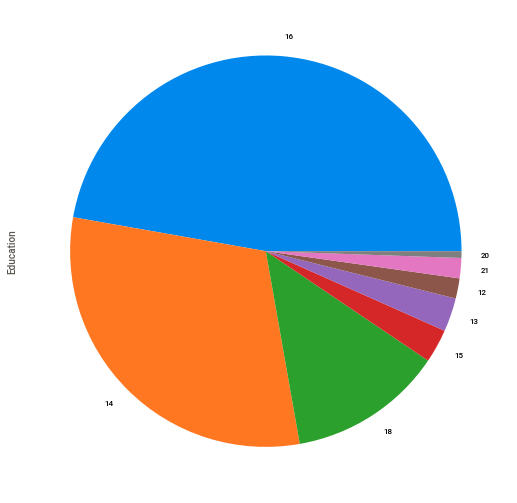

In [177]:
plt.figure(figsize = (15,9))
df.Education.value_counts().plot(kind='pie')

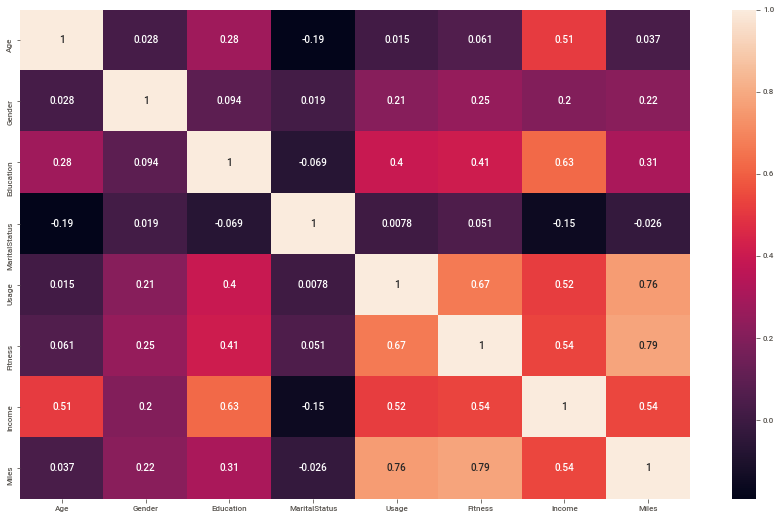

In [178]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

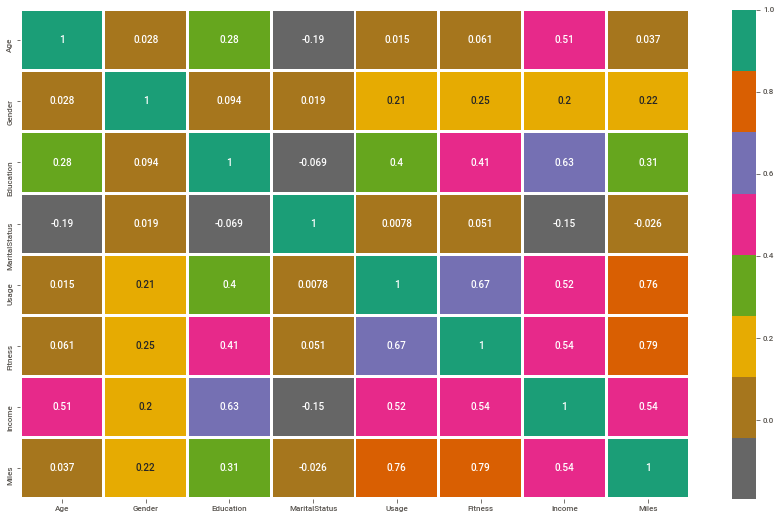

In [179]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

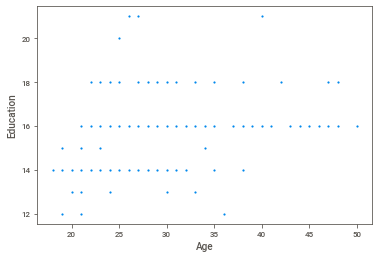

In [180]:
sns.scatterplot(x='Age',y='Education',data=df)

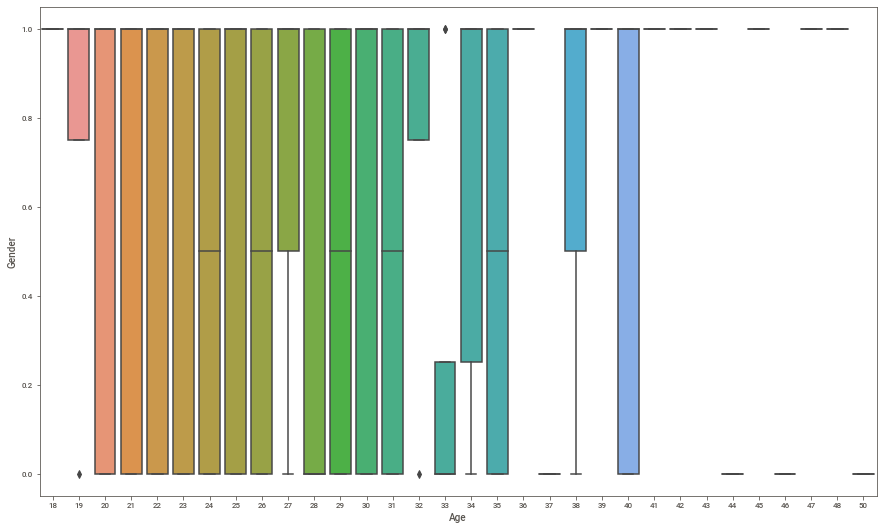

In [181]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Age',y='Gender',data=df)

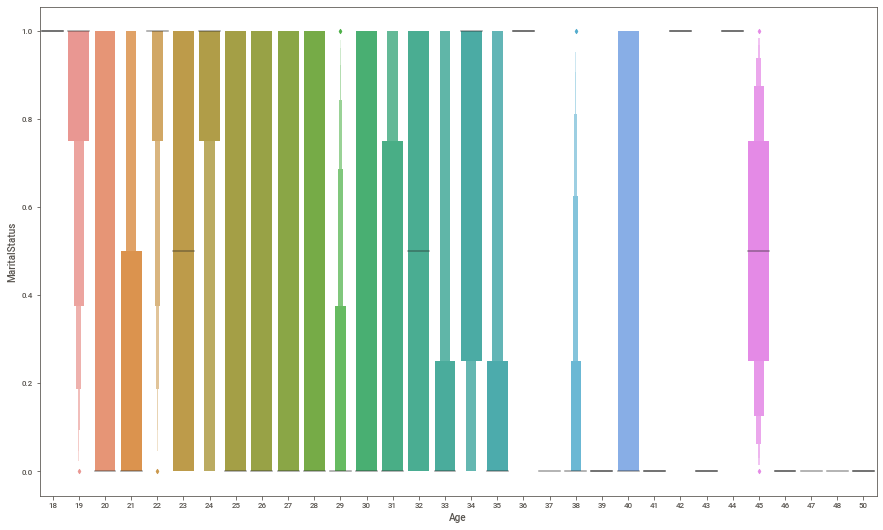

In [182]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Age',y='MaritalStatus',data=df)

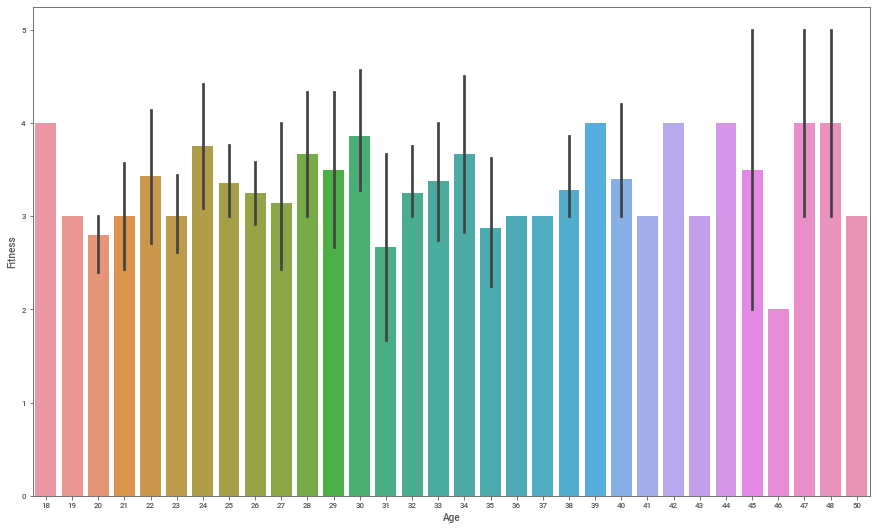

In [183]:
plt.figure(figsize=(15,9))
sns.barplot(x='Age',y='Fitness',data=df)

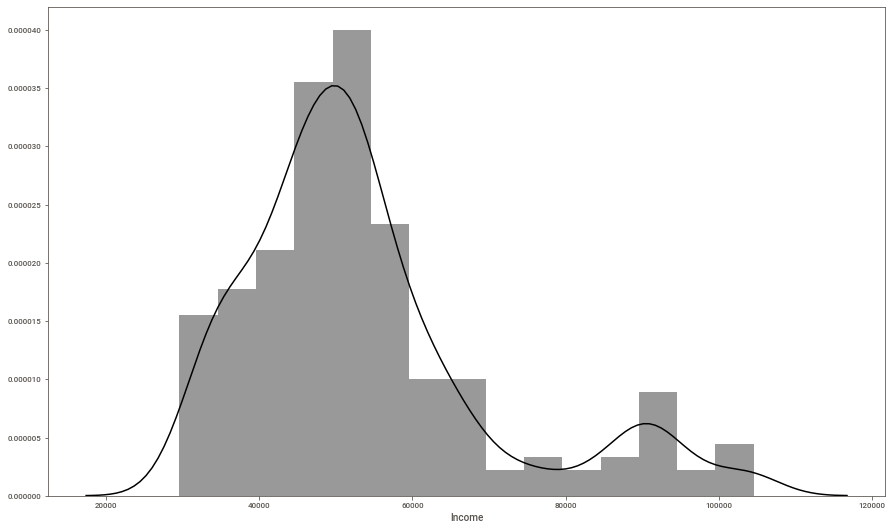

In [184]:
plt.figure(figsize=(15,9))
sns.distplot(df['Income'],color='black')

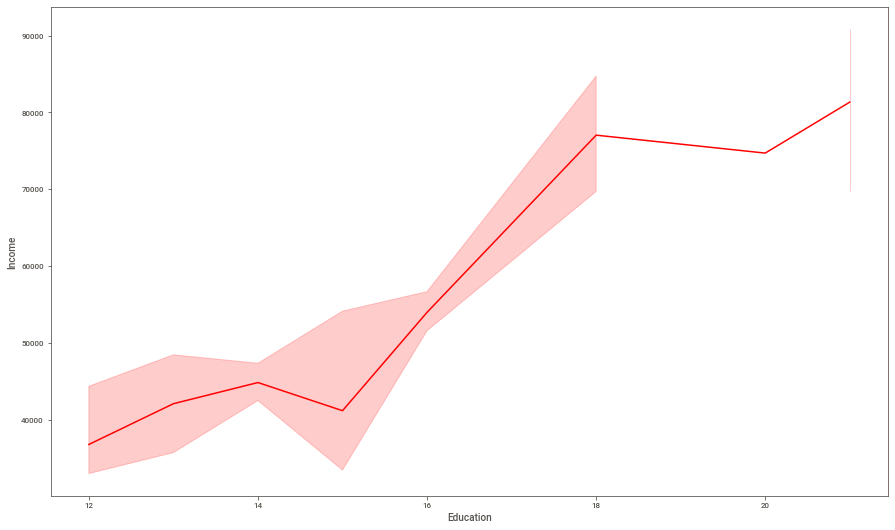

In [185]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Education',y='Income',data=df,color='red')

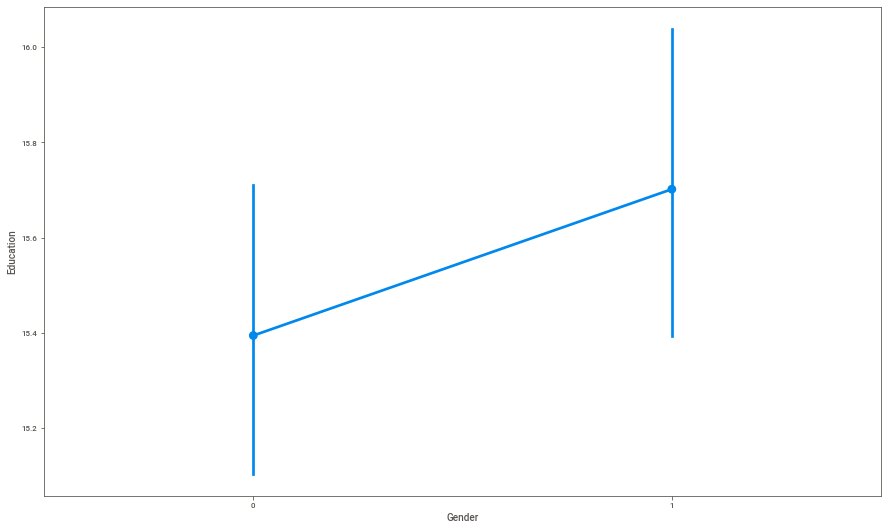

In [186]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Gender',y='Education',data=df)

<Figure size 1080x648 with 0 Axes>

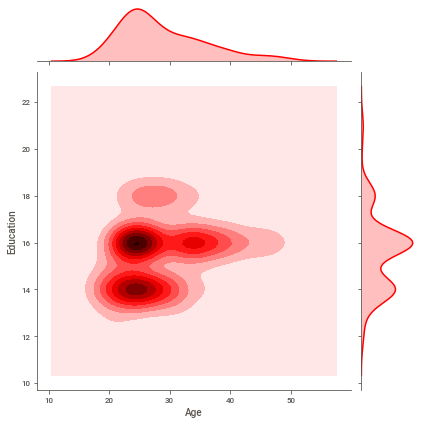

In [187]:
plt.figure(figsize=(15,9))
sns.jointplot(x='Age',y='Education',data=df,kind='kde',color='red')

In [188]:
df.head(2)

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,1,14,1,3,4,29562,112
1,19,1,15,1,2,3,31836,75


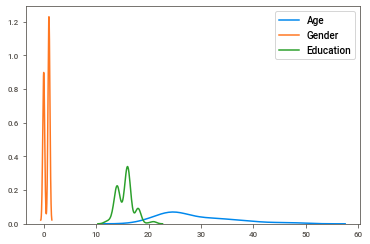

In [189]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Gender'])
sns.kdeplot(df['Education'])

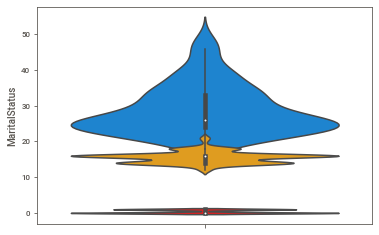

In [190]:
sns.violinplot(y="Age",data=df)
sns.violinplot(y="Education",data=df,color='orange')
sns.violinplot(y="MaritalStatus",data=df,color='red')

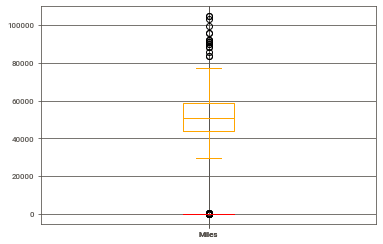

In [191]:
df.boxplot(column="Usage")
df.boxplot(column="Income",color='orange')
df.boxplot(column="Miles",color='red')

In [192]:
import sweetviz as sv

In [193]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [194]:
from IPython.display import IFrame

In [195]:
IFrame(src='Analyze.html',width=1000,height=600)

In [196]:
df.head(2)

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,1,14,1,3,4,29562,112
1,19,1,15,1,2,3,31836,75


In [202]:
df.columns

Index(['Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness',
       'Income', 'Miles'],
      dtype='object')

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [206]:
man=MinMaxScaler()
feat=['Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness',
       'Income', 'Miles']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0.00000,1.0,0.222222,1.0,0.2,0.75,0.000000,0.268437
1,0.03125,1.0,0.333333,1.0,0.0,0.50,0.030312,0.159292
2,0.03125,0.0,0.222222,0.0,0.4,0.50,0.015156,0.132743
3,0.03125,1.0,0.000000,1.0,0.2,0.50,0.045468,0.188791
4,0.06250,1.0,0.111111,0.0,0.4,0.25,0.075781,0.076696
...,...,...,...,...,...,...,...,...
175,0.68750,1.0,1.000000,1.0,0.8,1.00,0.717871,0.528024
176,0.75000,1.0,0.666667,1.0,0.6,0.75,0.800850,0.528024
177,0.84375,1.0,0.444444,1.0,0.6,1.00,0.817446,0.410029
178,0.90625,1.0,0.666667,0.0,0.4,1.00,1.000000,0.292035


In [208]:
std=StandardScaler()
feat=['Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness',
       'Income', 'Miles']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,-1.558146,0.854850,-0.974987,1.210683,-0.421117,0.720443,-1.467585,0.170257
1,-1.413725,0.854850,-0.354854,1.210683,-1.345520,-0.325362,-1.329438,-0.545143
2,-1.413725,-1.169795,-0.974987,-0.825980,0.503286,-0.325362,-1.398512,-0.719159
3,-1.413725,0.854850,-2.215254,1.210683,-0.421117,-0.325362,-1.260365,-0.351792
4,-1.269303,0.854850,-1.595120,-0.825980,0.503286,-1.371166,-1.122218,-1.086527
...,...,...,...,...,...,...,...,...
175,1.619124,0.854850,3.365945,1.210683,2.352092,1.766248,1.804073,1.871748
176,1.907967,0.854850,1.505546,1.210683,1.427689,0.720443,2.182245,1.871748
177,2.341231,0.854850,0.265279,1.210683,1.427689,1.766248,2.257879,1.098343
178,2.630073,0.854850,1.505546,-0.825980,0.503286,1.766248,3.089857,0.324938
